## Introduction to our first task: 'Dogs vs Cats'

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
PATH = "data/dogscats/"
sz=224
batch_size=64

In [3]:
import os, shutil
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras.applications import ResNet50
from keras.applications import VGG16
from keras.models import Model, Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.applications.resnet50 import preprocess_input
from keras.layers import Input

In [5]:
train_data_dir = f'{PATH}train'
validation_data_dir = f'{PATH}valid'

In [6]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(train_data_dir,
    target_size=(sz, sz),
    batch_size=batch_size, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_data_dir,
    shuffle=False,
    target_size=(sz, sz),
    batch_size=batch_size, class_mode='binary')

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [53]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224,3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [54]:
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers: layer.trainable = False
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
model.fit_generator(train_generator, train_generator.n // batch_size, epochs=3, workers=4,
        validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

In [ ]:
split_at = 140
for layer in model.layers[:split_at]: layer.trainable = False
for layer in model.layers[split_at:]: layer.trainable = True
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])    

In [ ]:
tb_cb = keras.callbacks.TensorBoard(log_dir=log_filepath, histogram_freq=1)
cbks = [tb_cb]

In [ ]:
%%time
history = model.fit_generator(train_generator, train_generator.n // batch_size, epochs=1, workers=3,
        validation_data=validation_generator, validation_steps=validation_generator.n // batch_size)

In [56]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_51 (Activation)      (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [ ]:
model.save('cats_and_dogs_small.h5')

In [55]:
model.load_weights('cats_and_dogs_small_2.h5')

In [57]:
TEST_DIR = f'{PATH}test1'

In [58]:
TEST_DIR

'data/dogscats/test1'

In [59]:
test_images =  [TEST_DIR+"/"+i for i in os.listdir(TEST_DIR)]

In [60]:
test_simple = test_images[:1000]

In [91]:
test_simple

['data/dogscats/test1/9885.jpg',
 'data/dogscats/test1/2701.jpg',
 'data/dogscats/test1/11231.jpg',
 'data/dogscats/test1/2964.jpg',
 'data/dogscats/test1/10651.jpg',
 'data/dogscats/test1/8302.jpg',
 'data/dogscats/test1/3656.jpg',
 'data/dogscats/test1/146.jpg',
 'data/dogscats/test1/2383.jpg',
 'data/dogscats/test1/8375.jpg',
 'data/dogscats/test1/12209.jpg',
 'data/dogscats/test1/2759.jpg',
 'data/dogscats/test1/7196.jpg',
 'data/dogscats/test1/6623.jpg',
 'data/dogscats/test1/9046.jpg',
 'data/dogscats/test1/3139.jpg',
 'data/dogscats/test1/2993.jpg',
 'data/dogscats/test1/7106.jpg',
 'data/dogscats/test1/1597.jpg',
 'data/dogscats/test1/7190.jpg',
 'data/dogscats/test1/4406.jpg',
 'data/dogscats/test1/11664.jpg',
 'data/dogscats/test1/9112.jpg',
 'data/dogscats/test1/1127.jpg',
 'data/dogscats/test1/8657.jpg',
 'data/dogscats/test1/5462.jpg',
 'data/dogscats/test1/4651.jpg',
 'data/dogscats/test1/9998.jpg',
 'data/dogscats/test1/12051.jpg',
 'data/dogscats/test1/11696.jpg',
 'dat

In [65]:
img_path = 'data/dogscats/test1/1.jpg' 
img = image.load_img(img_path, target_size=(224, 224)) 
x = image.img_to_array(img) 
x = np.expand_dims(x, axis=0) 
x = preprocess_input(x) 
print('Input image shape:', x.shape) 

Input image shape: (1, 224, 224, 3)


In [ ]:
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, 224, 224,3), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%1000 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

In [76]:
def read_image(file_path):
    img = image.load_img(file_path, target_size=(224, 224)) 
    x = image.img_to_array(img) 
    x = np.expand_dims(x, axis=0) 
    x = preprocess_input(x) 
    return x

In [79]:
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, 224, 224,3), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
        if i%1000 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

In [80]:
test = prep_data(test_simple)

Processed 0 of 1000


In [81]:
test.shape

(1000, 224, 224, 3)

In [82]:
predictions = model.predict(test)

I am 100.00% sure this is a Dog


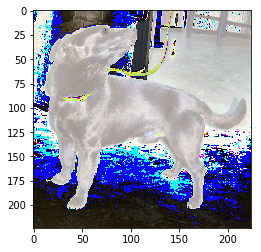

I am 100.00% sure this is a Dog


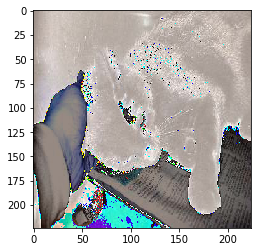

I am 100.00% sure this is a Dog


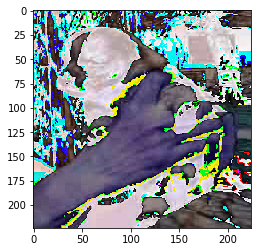

I am 100.00% sure this is a Dog


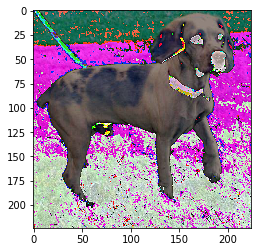

I am 99.43% sure this is a Dog


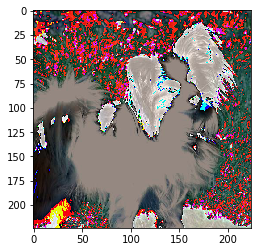

I am 100.00% sure this is a Dog


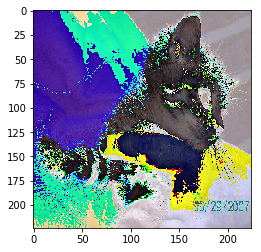

I am 100.00% sure this is a Dog


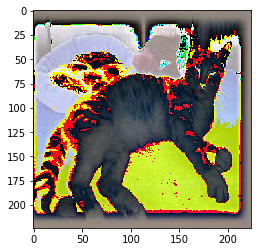

I am 100.00% sure this is a Dog


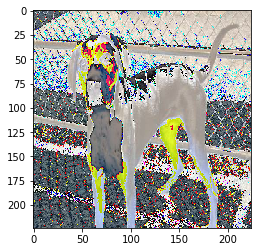

I am 100.00% sure this is a Dog


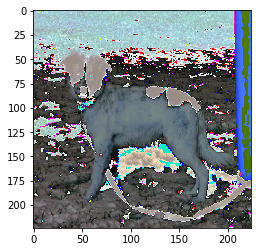

I am 100.00% sure this is a Dog


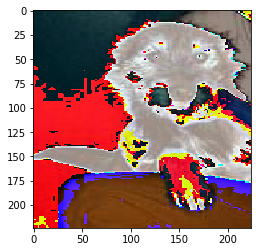

In [83]:
for i in range(0,10):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a Dog'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Cat'.format(1-predictions[i][0]))
        
    plt.imshow(test[i])
    plt.show()

In [88]:
predictions

array([[1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.94307339e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [4.57916455e-03],
       [7.28027880e-01],
       [4.68838274e-01],
       [1.99335481e-08],
       [9.99913216e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99811947e-01],
       [1.00000000e+00],
       [9.99975562e-01],
       [5.17849624e-01],
       [1.25721994e-11],
       [6.02417029e-02],
       [3.51577718e-03],
       [9.99335229e-01],
       [1.57098118e-02],
       [9.99999881e-01],
       [6.44977808e-01],
       [6.18176758e-01],
       [1.00000000e+00],
       [2.63688378e-07],
       [1.00000000e+00],
       [2.71232903e-01],
       [4.65020724e-02],
       [9.99999762e-01],
       [1.00000000e+00],
       [9.99999642e-01],
       [1.00000000e+00],


In [103]:
df = pd.DataFrame(predictions)

In [104]:
df.head()

,0
0,1.000000
1,1.000000
2,1.000000
3,1.000000
4,0.994307


In [105]:
df.insert(0,'id', [o[20:-4] for o in test_simple])

In [106]:
df.head()

,id,0
0,9885,1.000000
1,2701,1.000000
2,11231,1.000000
3,2964,1.000000
4,10651,0.994307


In [107]:
df.columns = ["id", "label"]

In [108]:
df.head()

,id,label
0,9885,1.000000
1,2701,1.000000
2,11231,1.000000
3,2964,1.000000
4,10651,0.994307
